In [24]:
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [2]:
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
fetch_california_housing().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
fetch_california_housing()['data']

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [5]:
len(fetch_california_housing()['data'])

20640

In [6]:
data=fetch_california_housing()['data']
target=fetch_california_housing()['target']
input_col=fetch_california_housing()['feature_names']
out_col=fetch_california_housing()['target_names']

In [8]:
df=pd.DataFrame()

In [9]:
df[input_col]=data

In [10]:
df[out_col[0]]=target

In [11]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [14]:
len(df.columns)

9

In [15]:
california_df=fetch_california_housing(as_frame=True).frame
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [16]:
california_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

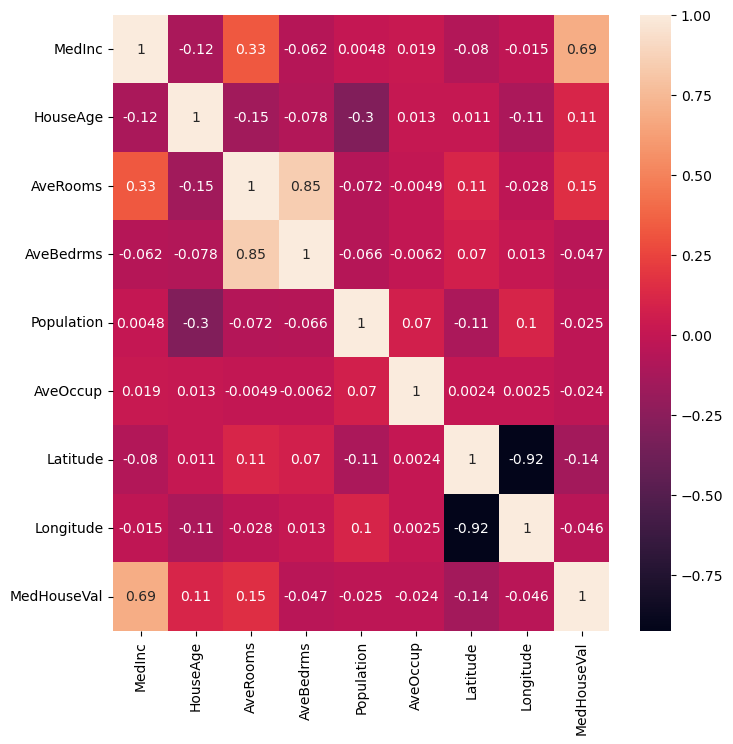

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns
corr=california_df.corr()
plt.figure(figsize=[8,8])
sns.heatmap(corr,annot=True)

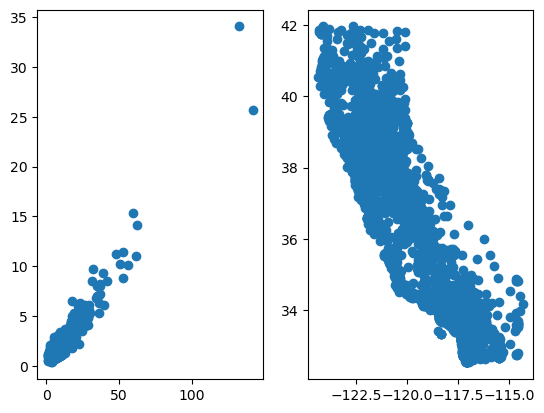

In [18]:
plt.subplot(1,2,1).scatter(california_df['AveRooms'],california_df['AveBedrms'])
plt.subplot(1, 2, 2).scatter(california_df['Longitude'],california_df['Latitude'])

In [19]:
X=california_df.drop('MedHouseVal',axis=1)
y=california_df['MedHouseVal']

In [21]:
# VIF calculation

variance_inflation_factor(X.values,0)

11.511140059486932

In [22]:
vif=[]
for i in range(len(X.columns)):
    values=variance_inflation_factor(X.values,i)
    vif.append(values)
pd.DataFrame(vif,index=X.columns)

,0
MedInc,11.511140
HouseAge,7.195917
AveRooms,45.993601
AveBedrms,43.590314
Population,2.935745
AveOccup,1.095243
Latitude,559.874071
Longitude,633.711654


In [23]:
final_Cols=['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup',
       'Latitude']
final_df=pd.DataFrame()
final_df=X[final_Cols].copy()
final_df['MedHouseVal']=y
final_df

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,0.847


In [34]:
# Standard scaling
X=final_df.drop('MedHouseVal',axis=1)
y=final_df['MedHouseVal']
ss=StandardScaler()
x_scaled=ss.fit_transform(X)

In [35]:
Scaled_df=pd.DataFrame()
Scaled_df[X.columns]=x_scaled.copy()
Scaled_df['MedHouseVal']=y
Scaled_df

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.974429,-0.049597,1.052548,4.526
1,2.332238,-0.607019,0.327041,0.861439,-0.092512,1.043185,3.585
2,1.782699,1.856182,1.155620,-0.820777,-0.025843,1.038503,3.521
3,0.932968,1.856182,0.156966,-0.766028,-0.050329,1.038503,3.413
4,-0.012881,1.856182,0.344711,-0.759847,-0.085616,1.038503,3.422
...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,-0.512592,-0.049110,1.801647,0.781
20636,-0.691593,-0.845393,0.276881,-0.944405,0.005021,1.806329,0.771
20637,-1.142593,-0.924851,-0.090318,-0.369537,-0.071735,1.778237,0.923
20638,-1.054583,-0.845393,-0.040211,-0.604429,-0.091225,1.778237,0.847


In [36]:
Scaled_df.to_csv('California_Updated_file.csv',index=False)

In [37]:
data=pd.read_csv('California_Updated_file.csv')

In [39]:
data.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.974429,-0.049597,1.052548,4.526
1,2.332238,-0.607019,0.327041,0.861439,-0.092512,1.043185,3.585
2,1.782699,1.856182,1.155620,-0.820777,-0.025843,1.038503,3.521
3,0.932968,1.856182,0.156966,-0.766028,-0.050329,1.038503,3.413
4,-0.012881,1.856182,0.344711,-0.759847,-0.085616,1.038503,3.422


In [40]:
X=data.drop('MedHouseVal',axis=1)
y=data['MedHouseVal']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [43]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((16512, 6), (16512,), (4128, 6), (4128,))

In [44]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [45]:
lr.intercept_

2.064461711696833

In [46]:
lr.coef_

array([ 0.83282203,  0.21988607, -0.06751527,  0.02088911, -0.04501625,
       -0.09058146])

In [47]:
y_pred=lr.predict(X_test)

In [48]:
final_df=pd.DataFrame()
final_df

""


In [49]:
final_df=X_test.copy()
final_df['y_actual']=y_test
final_df['y_prediction']=y_pred
final_df['error']=y_test-y_pred

In [51]:
final_df

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,y_actual,y_prediction,error
15712,-0.099733,1.856182,-0.234704,-0.716577,-0.129594,1.010411,5.00000,2.304737,2.695263
4119,0.885225,1.856182,0.282943,0.367812,-0.009598,-0.698469,2.93900,3.262126,-0.323126
15725,0.002279,1.220517,-0.278781,-0.763379,-0.129966,1.005730,4.12500,2.252360,1.872640
14616,-0.210589,-0.686477,-0.062546,0.350151,0.031639,-1.325839,1.57600,1.868342,-0.292342
13238,2.027992,-1.481058,1.045992,-0.180564,0.035508,-0.703151,3.04100,3.415456,-0.374456
...,...,...,...,...,...,...,...,...,...
13521,0.703519,-0.686477,0.299587,-0.779274,-0.017558,-0.651651,1.64300,2.522734,-0.879734
16913,5.011449,-0.289187,1.390417,0.071989,-0.007758,0.898047,5.00001,6.001151,-1.001141
20069,-0.699541,0.108104,-0.138627,-1.045073,-0.045110,1.113413,1.23200,1.394344,-0.162344
446,0.002279,1.856182,-0.421058,-0.917913,-0.113472,1.047866,1.82600,2.393952,-0.567952


In [52]:
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error

In [53]:
mse=mean_squared_error(y_test,y_pred)
mse

0.6676008481118304

In [55]:
rmse=root_mean_squared_error(y_test,y_pred)
rmse

0.8170684476295914

In [56]:
r2_score(y_test,y_pred)

0.5065090715994581

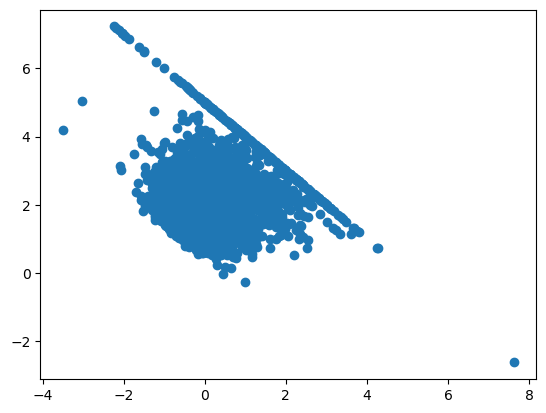

In [57]:
# Residual Plot
errors=y_test-y_pred
import matplotlib.pyplot as plt
plt.scatter(errors,y_pred)

(array([2.000e+00, 5.100e+01, 1.912e+03, 1.684e+03, 3.590e+02, 1.050e+02,
        1.400e+01, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-3.50631499, -2.39349757, -1.28068015, -0.16786274,  0.94495468,
         2.0577721 ,  3.17058952,  4.28340694,  5.39622435,  6.50904177,
         7.62185919]),
 <BarContainer object of 10 artists>)

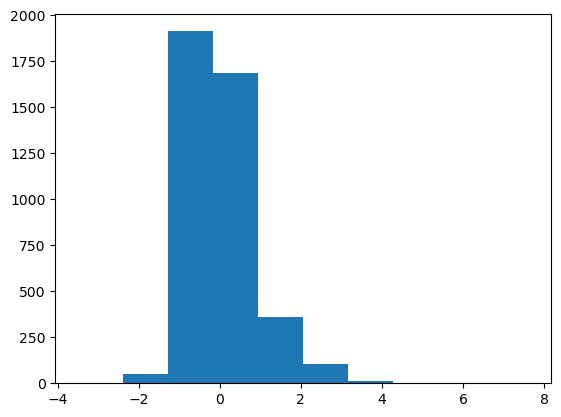

In [58]:
plt.hist(errors)

In [59]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

In [60]:
dw_stat = durbin_watson(errors)

In [61]:
dw_stat

2.0319535497836316

In [ ]:
import joblib 